# Linear Regression - Predicting House Sale Prices <a class="tocSkip">

In this project, I'll be working with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was by Dean De Cock collected [here](https://doi.org/10.1080/10691898.2011.11889627). You can also read about the different columns in the data [here](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

**Abstract of the work related to the dataset**

" _This paper presents a data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. I will discuss my previous use of the Boston Housing Data Set and I will suggest methods for incorporating this new data set as a final project in an undergraduate regression course._ "

**Project Goal**

The goal of this project is to apply a machine learning workflow related to **linear regression** models (multivariate). 

The pipeline of functions that will let us quickly iterate on different models could be represented as:

<img src="pipeline.svg" />

The workflow is the following:

1. **Feature selection**: _Keep only what it's useful_
    
    1. Evaluate **correlation** between features and the target. Only features that present high correlation will be kept.
    2. Evaluate then the **correlation** between different features and recognize whether there is collinearity (redundant information) or not. Those features that present collinearity will be represented by only one of them, the most representative/usefull for our analysis.
    3. Evaluate the **variance** of the different features. Those features without enough variance are considered kind of constants and therefore will be removed

2. **Feature scaling**: _Make all features comparable_
    Each feature will be scaled from 0 to 1
3. **Feature engineering**: _Process existing features to create new ones, useful_
    1. The categorical types will not be converted to codes but instead will be converted by dummy coding. This means that for each category presented in a feature, a new feature will be generated and used as boolean. 
    2. Features with missing values will be either deleted or filled with mean values, depending in how many values are missing.

# **Setup for this notebook**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

# Exploring the dataset

In [2]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

In [3]:
df.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  
3        0       4    2010       WD           Normal     244000  
4        0       3    2010       WD           Normal     189900  

[5 rows x 82 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

# Defining Helper functions

In [5]:
def select_num_features(df):
    return df.select_dtypes(include=['integer', 'float'])

In [6]:
def transform_features(df):
    return df

In [7]:
def select_features(df):
    """
    Selects only the features of interest
    """
    return df[["Gr Liv Area", "SalePrice"]]

In [46]:
def train_and_test(df):  
    """
    Split the dataset in train and test sets
    """
    train = df[:1460]
    test = df[1460:]
    # Filter only numerical columns
    numeric_train = select_num_features(train)
    numeric_test = select_num_features(test)
    # Selecting desired features
    features = df.drop("SalePrice", axis=1).columns
    # Model fit and predictions
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    # Error evaluation
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

## Initial try
The following RMSE is produced with the actual model:

In [9]:
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

print('RMSE: {:.2f}'.format(rmse))

RMSE: 57088.25


# Working with Numerical Features

To develop the function **_transform_features()_** I'm covering some aspects that are explained in the following sections.

We need to simplify the dataset as much as possible. Fot this reason, I will analyze and determine which numerical columns aren't useful for our target.

In [10]:
df_num = select_num_features(df)
print('There is a total of {} numerical features'.format(df_num.shape[1]))

There is a total of 39 numerical features


Here is an example of the first 3 rows, which is shown as transposed for readeability:

In [11]:
df_num.head(3).transpose()

0            1            2
Order                    1.0          2.0          3.0
PID              526301100.0  526350040.0  526351010.0
MS SubClass             20.0         20.0         20.0
Lot Frontage           141.0         80.0         81.0
Lot Area             31770.0      11622.0      14267.0
Overall Qual             6.0          5.0          6.0
Overall Cond             5.0          6.0          6.0
Year Built            1960.0       1961.0       1958.0
Year Remod/Add        1960.0       1961.0       1958.0
Mas Vnr Area           112.0          0.0        108.0
BsmtFin SF 1           639.0        468.0        923.0
BsmtFin SF 2             0.0        144.0          0.0
Bsmt Unf SF            441.0        270.0        406.0
Total Bsmt SF         1080.0        882.0       1329.0
1st Flr SF            1656.0        896.0       1329.0
2nd Flr SF               0.0          0.0          0.0
Low Qual Fin SF          0.0          0.0          0.0
Gr Liv Area           1656.0        896.0       1329.0
Bsmt Full Bath           1.0          0.0          0.0
Bsmt Half Bath           0.0          0.0          0.0
Full Bath                1.0          1.0          1.0
Half Bath                0.0          0.0          1.0
Bedroom AbvGr            3.0          2.0          3.0
Kitchen AbvGr            1.0          1.0          1.0
TotRms AbvGrd            7.0          5.0          6.0
Fireplaces               2.0          0.0          0.0
Garage Yr Blt         1960.0       1961.0       1958.0
Garage Cars              2.0          1.0          1.0
Garage Area            528.0        730.0        312.0
Wood Deck SF           210.0        140.0        393.0
Open Porch SF           62.0          0.0         36.0
Enclosed Porch           0.0          0.0          0.0
3Ssn Porch               0.0          0.0          0.0
Screen Porch             0.0        120.0          0.0
Pool Area                0.0          0.0          0.0
Misc Val                 0.0          0.0      12500.0
Mo Sold                  5.0          6.0          6.0
Yr Sold               2010.0       2010.0       2010.0
SalePrice           215000.0     105000.0     172000.0

## Managing Missing Values

The following criteria for missing values is applied:

- If the missing values represent **less or equal than 5%** of the total, then the feature is kept and the missing values are filled with the feature's mean
- If the missing values are **more than 5%** of the total, then the feature is removed

In [12]:
null_series = df_num.isnull().sum()
null_series.sort_values(ascending=False).head(13)

Lot Frontage      490
Garage Yr Blt     159
Mas Vnr Area       23
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Cars         1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Total Bsmt SF       1
Garage Area         1
Lot Area            0
Overall Qual        0
dtype: int64

In [13]:
# Total of inputs
n = df_num.shape[0]

# Show information about the dataset
print('There is a total of {} inputs\n'.format(n))
print('A 5% means {:d} inputs'.format(round(n*0.05)))

There is a total of 2930 inputs

A 5% means 146 inputs


### Remove features with more than 5% missing values

In [14]:
more_t_5_percent = null_series > n * 0.05
to_remove = null_series[more_t_5_percent]

df_num = df_num.drop(to_remove.index, axis=1)

### Fill missing values with feature's mean

In [15]:
# View filters
diff_t_zero = null_series != 0
less_5_percent = null_series <= n * 0.05

full_cols = null_series[less_5_percent]

almost_full_cols = null_series[diff_t_zero & less_5_percent]

print('\nThe {} features with less than 5% missing values (and different than zero) are:\n'.format(almost_full_cols.shape[0]))
print(almost_full_cols)

tmp_df = df_num.loc[:,almost_full_cols.index].copy()
df_num.loc[:,almost_full_cols.index] = tmp_df.fillna(df_num.loc[:,almost_full_cols.index].mean())


The 9 features with less than 5% missing values (and different than zero) are:

Mas Vnr Area      23
BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Bsmt Full Bath     2
Bsmt Half Bath     2
Garage Cars        1
Garage Area        1
dtype: int64


Summarizing, we have 9 features in which their missing values will be filled with the feature mean values and 28 features with no missing values from which 6 features will be removed since they don't provide useful information related to the sale price.

# Working With Categorical Features

Categorical features may contain useful information to train the model.
We should however make this features 'readable', i.e. represent them in a way the training process can make use of it.
One technique is to convert a column to the **categorical data type**.
This implies assigning one of a limited number of possible values to one categorical feature. 
For example "Category 1" would be just "1" and so on.
This basically transforms words to numbers and is more machine-friendly.
A drawback to converting a column to the categorical data type is that one of the assumptions of linear regression is violated. Linear regression operates under the assumption that the features are linearly correlated with the target column.

Instead of converting to the categorical data type, it's common to use a second technique called **dummy coding**. In dummy coding, a dummy variable is used. A dummy variable that takes the value of or to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.

In [16]:
# From data documentation
ordinals = ['Lot Shape', 'Utilities', 'Land Slope', 'Overall Qual', 'Overall Cond', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFinType 2', 'HeatingQC', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence']
nominals = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1', 'Exterior 2', 'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature', 'Sale Type', 'Sale Condition']

feats_to_evaluate = []
feats_to_evaluate.extend(ordinals)
feats_to_evaluate.extend(nominals)

print('Ordinal variables: {}'.format(len(ordinals)))
print('Nominal variables: {}'.format(len(nominals)))

print(pd.Series(feats_to_evaluate))

Ordinal variables: 23
Nominal variables: 24
0          Lot Shape
1          Utilities
2         Land Slope
3       Overall Qual
4       Overall Cond
5         Exter Qual
6         Exter Cond
7          Bsmt Qual
8          Bsmt Cond
9      Bsmt Exposure
10    BsmtFin Type 1
11     BsmtFinType 2
12         HeatingQC
13        Electrical
14       KitchenQual
15        Functional
16       FireplaceQu
17     Garage Finish
18       Garage Qual
19       Garage Cond
20       Paved Drive
21           Pool QC
22             Fence
23               PID
24       MS SubClass
25         MS Zoning
26            Street
27             Alley
28      Land Contour
29        Lot Config
30      Neighborhood
31       Condition 1
32       Condition 2
33         Bldg Type
34       House Style
35        Roof Style
36         Roof Matl
37        Exterior 1
38        Exterior 2
39      Mas Vnr Type
40        Foundation
41           Heating
42       Central Air
43       Garage Type
44      Misc Feature
45         

In [17]:
df.loc[:, feats_to_evaluate].reindex().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 47 columns):
Lot Shape         2930 non-null object
Utilities         2930 non-null object
Land Slope        2930 non-null object
Overall Qual      2930 non-null int64
Overall Cond      2930 non-null int64
Exter Qual        2930 non-null object
Exter Cond        2930 non-null object
Bsmt Qual         2850 non-null object
Bsmt Cond         2850 non-null object
Bsmt Exposure     2847 non-null object
BsmtFin Type 1    2850 non-null object
BsmtFinType 2     0 non-null float64
HeatingQC         0 non-null float64
Electrical        2929 non-null object
KitchenQual       0 non-null float64
Functional        2930 non-null object
FireplaceQu       0 non-null float64
Garage Finish     2771 non-null object
Garage Qual       2771 non-null object
Garage Cond       2771 non-null object
Paved Drive       2930 non-null object
Pool QC           13 non-null object
Fence             572 non-null object
PID      

/home/fede/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [18]:
# Select only variables that contain text
text_cols = df.select_dtypes(include=['object']).columns
print('There are a total of {} text variables from the {} list'
      .format(len(text_cols), len(feats_to_evaluate)))

There are a total of 43 text variables from the 47 list


In [19]:
print('The following items were already considered as numerical:')
feats_out = list(set(feats_to_evaluate) - set(list(text_cols.values)))
feats_to_analyze = list(set(feats_to_evaluate) - set(feats_out))
print(pd.Series(feats_out).sort_values(ascending=False))

The following items were already considered as numerical:
3              PID
5     Overall Qual
1     Overall Cond
6      MS SubClass
9      KitchenQual
8        HeatingQC
7      FireplaceQu
2       Exterior 2
0       Exterior 1
4    BsmtFinType 2
dtype: object


In [20]:
print('Categories for each variable\n')
features_uniques = {}
for col in feats_to_analyze:
    features_uniques[col] =  len(df[col].value_counts())

df_feats_to_analyze = pd.DataFrame(data=features_uniques.items(),
             columns=['Feature', '# of Categories']
            ).sort_values(by='# of Categories', ascending=False)

print(df_feats_to_analyze)

Categories for each variable

           Feature  # of Categories
0     Neighborhood               28
20       Sale Type               10
15     Condition 1                9
34      Functional                8
33       Roof Matl                8
26     Condition 2                8
36     House Style                8
23       MS Zoning                7
10  Sale Condition                6
12      Foundation                6
24         Heating                6
6       Roof Style                6
16     Garage Type                6
17  BsmtFin Type 1                6
1       Exter Cond                5
21     Garage Qual                5
27      Lot Config                5
4       Electrical                5
25     Garage Cond                5
8        Bsmt Cond                5
32       Bldg Type                5
31    Misc Feature                5
2        Bsmt Qual                5
11    Mas Vnr Type                5
5          Pool QC                4
19    Land Contour                

We want to keep from this list as few as possible features, then we have to define a filter. 

I propose to count how many items are in each variable (feature) and observe whether the items are well distributed or only a few of them are used. For this I will show the ratio $std/mean$ (standard deviation over mean value). If the items are well distributed, then the std/mean value should be smaller. In the contrary, when only one or few items are used in available possibilities, then the ratio std/mean will be higher than 1.

In [21]:
print('Percentual distribution for each variable:\n')
feats_analysis_outcomes = {}
for col in feats_to_analyze:
    val_c = df[col].value_counts()
    s = val_c.std()
    m = val_c.mean()
    ratio = s/m
    if ratio > 1:
        verdict = '(Not useful)'
    else:
        verdict = '(Useful)'

    feats_analysis_outcomes[col] = verdict

    print(col + verdict)
    print('std/mean = {:.2f}'.format(ratio))
    print('n={}\n'.format(len(val_c)))
    print(df[col].value_counts(normalize=True)*100, '\n')

Percentual distribution for each variable:

Neighborhood(Useful)
std/mean = 0.95
n=28

NAmes      15.119454
CollgCr     9.112628
OldTown     8.156997
Edwards     6.621160
Somerst     6.211604
NridgHt     5.665529
Gilbert     5.631399
Sawyer      5.153584
NWAmes      4.470990
SawyerW     4.266212
Mitchel     3.890785
BrkSide     3.686007
Crawfor     3.515358
IDOTRR      3.174061
Timber      2.457338
NoRidge     2.423208
StoneBr     1.740614
SWISU       1.638225
ClearCr     1.501706
MeadowV     1.262799
BrDale      1.023891
Blmngtn     0.955631
Veenker     0.819113
NPkVill     0.784983
Blueste     0.341297
Greens      0.273038
GrnHill     0.068259
Landmrk     0.034130
Name: Neighborhood, dtype: float64 

Exter Cond(Not useful)
std/mean = 1.88
n=5

TA    86.996587
Gd    10.204778
Fa     2.286689
Ex     0.409556
Po     0.102389
Name: Exter Cond, dtype: float64 

Bsmt Qual(Not useful)
std/mean = 1.10
n=5

TA    45.017544
Gd    42.771930
Ex     9.052632
Fa     3.087719
Po     0.070175
Name: 

In [22]:
df_outcomes = pd.DataFrame(feats_analysis_outcomes.items(), columns=['Feature', 'Verdict'])
useful = df_outcomes.iloc[:,1] == '(Useful)'
n_outcomes = useful.sum()
print('We found {} useful from {} features:'.format(n_outcomes, len(text_cols)))
df_outcomes[useful].iloc[:,0]

We found 6 useful from 43 features:


0       Neighborhood
5            Pool QC
17    BsmtFin Type 1
18             Fence
22     Garage Finish
30             Alley
Name: Feature, dtype: object

In [23]:
# Check missing values
useful_cols = df_outcomes[useful]['Feature'].values
null_counts = df[useful_cols].isnull().sum().sort_values()
null_counts

Neighborhood         0
BsmtFin Type 1      80
Garage Finish      159
Fence             2358
Alley             2732
Pool QC           2917
dtype: int64

From the above analysis I will use the features:

- "Neighborhood"
- "BsmtFin Type 1"
- "Garage Finish"

since they do not present many missing values.

In [24]:
to_keep = ['BsmtFin Type 1', 'Garage Finish', 'Neighborhood']

useful_idx = df.loc[:,to_keep].dropna().index
df_cat = df.loc[useful_idx, to_keep]

print('Check missing values:\n', df_cat.isnull().sum())
print('\nCategorical data set has {} rows'.format(df_cat.shape[0]))

Check missing values:
 BsmtFin Type 1    0
Garage Finish     0
Neighborhood      0
dtype: int64

Categorical data set has 2705 rows


In [25]:
# Dummy codding
df_dummy = pd.get_dummies(df_cat, columns=to_keep, prefix='', prefix_sep='', )
df_dummy.sample(5)

ALQ  BLQ  GLQ  LwQ  Rec  Unf  Fin  RFn  Unf  Blmngtn  ...  NoRidge  \
2540    0    0    0    0    1    0    0    1    0        0  ...        0   
698     1    0    0    0    0    0    0    0    1        0  ...        0   
2485    0    0    0    1    0    0    0    0    1        0  ...        0   
1977    0    0    1    0    0    0    0    0    1        0  ...        0   
1578    0    0    0    0    0    1    1    0    0        0  ...        0   

      NridgHt  OldTown  SWISU  Sawyer  SawyerW  Somerst  StoneBr  Timber  \
2540        0        0      0       0        0        0        0       0   
698         0        1      0       0        0        0        0       0   
2485        0        0      0       1        0        0        0       0   
1977        0        1      0       0        0        0        0       0   
1578        0        0      0       0        0        0        0       1   

      Veenker  
2540        0  
698         0  
2485        0  
1977        0  
1578        0  

[5 rows x 37 columns]

# Features Correlation
The last process in this dataset simplification is to check correlations. We need to see if there is correlation with the sale price for each of the selected columns. We will consider the feature only if there is more than 0.30 correlation.

## Correlation With Respect To Sale Price

In [26]:
df_corrs = df_num.corr()
sorted_corrs = df_corrs['SalePrice'].abs().sort_values(ascending=False)
high_corr = sorted_corrs > 0.3
strong_corrs = sorted_corrs[high_corr].drop('SalePrice')
weak_corrs = sorted_corrs[~high_corr]
print(strong_corrs)
print('\nThe total of features matching this criterion is: {}'.format(len(strong_corrs)))

Overall Qual      0.799262
Gr Liv Area       0.706780
Garage Cars       0.647861
Garage Area       0.640385
Total Bsmt SF     0.632105
1st Flr SF        0.621676
Year Built        0.558426
Full Bath         0.545604
Year Remod/Add    0.532974
Mas Vnr Area      0.505784
TotRms AbvGrd     0.495474
Fireplaces        0.474558
BsmtFin SF 1      0.432794
Wood Deck SF      0.327143
Open Porch SF     0.312951
Name: SalePrice, dtype: float64

The total of features matching this criterion is: 15


In [27]:
df_num = df_num.drop(weak_corrs.index, axis=1)
df_num.head().transpose()

0         1         2         3         4
Overall Qual         6.0       5.0       6.0       7.0       5.0
Year Built        1960.0    1961.0    1958.0    1968.0    1997.0
Year Remod/Add    1960.0    1961.0    1958.0    1968.0    1998.0
Mas Vnr Area       112.0       0.0     108.0       0.0       0.0
BsmtFin SF 1       639.0     468.0     923.0    1065.0     791.0
Total Bsmt SF     1080.0     882.0    1329.0    2110.0     928.0
1st Flr SF        1656.0     896.0    1329.0    2110.0     928.0
Gr Liv Area       1656.0     896.0    1329.0    2110.0    1629.0
Full Bath            1.0       1.0       1.0       2.0       2.0
TotRms AbvGrd        7.0       5.0       6.0       8.0       6.0
Fireplaces           2.0       0.0       0.0       2.0       1.0
Garage Cars          2.0       1.0       1.0       2.0       2.0
Garage Area        528.0     730.0     312.0     522.0     482.0
Wood Deck SF       210.0     140.0     393.0       0.0     212.0
Open Porch SF       62.0       0.0      36.0       0.0      34.0
SalePrice       215000.0  105000.0  172000.0  244000.0  189900.0

## Features Collinearity

The correlation between features is also contemplated. If some features are highly correlated between each other, it could be the case that only one feature is needed instead of all of them due to collinearity.

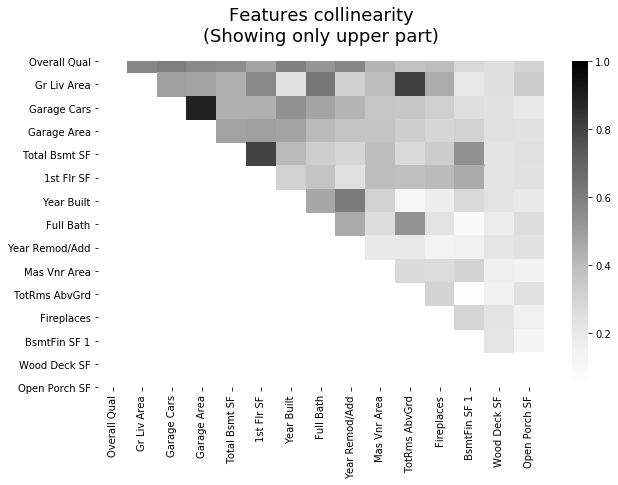

In [28]:
good_features = df_num[strong_corrs.index].corr()

f, ax = plt.subplots(figsize=(10, 6))
mask = np.tril(np.ones_like(good_features, dtype=np.bool))
sns.heatmap(good_features, cmap='Greys', mask=mask)
_ = ax.set_title('Features collinearity\n(Showing only upper part)',
                 pad=20, loc='center', size=18)

Since I am looking collinearity (high correlation between features), I decided that a threshold of 0.6 would be enough to highlight which features are redundant for this project.

Features highly correlated with other features:

Gr Liv Area       3
Garage Cars       2
Garage Area       2
Total Bsmt SF     2
1st Flr SF        2
Year Built        2
Full Bath         2
Year Remod/Add    2
TotRms AbvGrd     2
dtype: int64


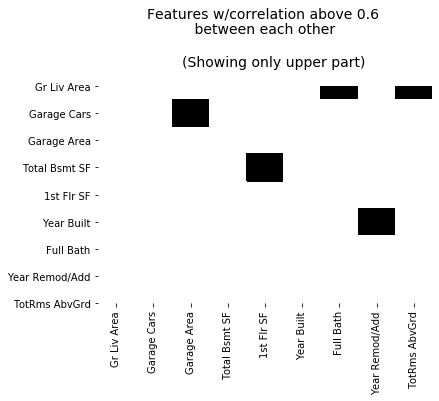

In [29]:
# Filter those features with correlation above 0.60 between each other
corr_threshold = 0.6
collinear_features = good_features > corr_threshold

print('Features highly correlated with other features:\n')
found_corrs = collinear_features.sum()

# Exclude the correlation matrix's diagonal
print(found_corrs[found_corrs > 1])
cols = list(found_corrs[found_corrs > 1].index)

# Generate a mask for the lower triangle for plotting
df_to_plot = collinear_features.loc[cols, cols]
mask = np.tril(np.ones_like(df_to_plot, dtype=np.bool))

f, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(df_to_plot,  mask=mask, cmap='Greys', cbar=False)
_ = ax.set_title(
    """Features w/correlation above {} \n between each other \n
    (Showing only upper part)"""
    .format(corr_threshold), pad=20, loc='center', size=14)

Based on the correlation values we found, I can tell that the following pairs of columns are strongly correlated:

    "Gr Liv Area" with "Full Bath" and "TotRms AbvGrd"
    "Garage Cars" with "Garage Area"
    "Total Bsmt SF" with "1st Flr SF"
    "Year Built" with "Year Remod/Add"


If we read the descriptions of these columns from the [data documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), we can tell that each pair of columns reflects very similar information. Because **_Gr Liv Area_** and **_Garage Area_** are continuous variables that capture more nuance, let's drop the **_TotRms AbvGrd_** and **_Garage Cars_**.
Regarding **_Full Bath_**, we can keep this feature, since it should be proportional to **_Gr Liv Area_** but this is not for sure and may contain useful information for the model.

On the other hand, **_Total Bsmt SF_** is correlated with **_1st Flr SF_**. This is logical since the basement should have the same area as the first floor, but we cannot assure that we can simplify both features in only one of them. That could mean to loose information for the model.

For the last features listed above, **_Year Remod/Add_** adds information about remodel but if the house have no remodel, then this value is the same as **_Year Built_**. This seems to be the source of the correlation between those two features. Let's see the difference between them:

In [30]:
print("Years of difference between 'Year Built' and 'Year Remod/Add' as percentual values:")
df_num[['Year Built', 'Year Remod/Add']].diff(axis=1).iloc[:,1].value_counts(normalize=True)*100

Years of difference between 'Year Built' and 'Year Remod/Add' as percentual values:


 0.0      53.549488
 1.0      14.812287
 30.0      1.296928
 40.0      1.092150
 25.0      0.921502
            ...    
 116.0     0.034130
 107.0     0.034130
-1.0       0.034130
 123.0     0.034130
 105.0     0.034130
Name: Year Remod/Add, Length: 117, dtype: float64

This shows that more than 68% of the values are not useful for this analysis and therefore the feature **_Year Remod/Add_** will be removed.

In [31]:
df_num = df_num.drop(['TotRms AbvGrd', 'Garage Cars', 'Year Remod/Add'], axis=1)

## Scaling features

We came from 39 numerical feature to a total of 13 useful features. In this step, each of them will be scaled in a range from 0 to 1. Feature scaling helps ensure that some columns aren't weighted more than others when helping the model make predictions.

In [32]:
max_val = df_num.max()
min_val = df_num.min()

df_num = (df_num - min_val)/(max_val - min_val)
# Validation
df_num.describe().transpose()

count      mean       std  min       25%       50%       75%  \
Overall Qual   2930.0  0.566098  0.156781  0.0  0.444444  0.555556  0.666667   
Year Built     2930.0  0.719973  0.219169  0.0  0.594203  0.731884  0.934783   
Mas Vnr Area   2930.0  0.063686  0.111505  0.0  0.000000  0.000000  0.101719   
BsmtFin SF 1   2930.0  0.078425  0.080707  0.0  0.000000  0.065645  0.130050   
Total Bsmt SF  2930.0  0.172114  0.072101  0.0  0.129787  0.162029  0.213011   
1st Flr SF     2930.0  0.173400  0.082313  0.0  0.113894  0.157530  0.220542   
Gr Liv Area    2930.0  0.219610  0.095235  0.0  0.149209  0.208742  0.265401   
Full Bath      2930.0  0.391638  0.138235  0.0  0.250000  0.500000  0.500000   
Fireplaces     2930.0  0.149829  0.161980  0.0  0.000000  0.250000  0.250000   
Garage Area    2930.0  0.317755  0.144496  0.0  0.215054  0.322581  0.387097   
Wood Deck SF   2930.0  0.065837  0.088737  0.0  0.000000  0.000000  0.117978   
Open Porch SF  2930.0  0.064061  0.090948  0.0  0.000000  0.036388  0.094340   
SalePrice      2930.0  0.226360  0.107633  0.0  0.157248  0.198341  0.270423   

               max  
Overall Qual   1.0  
Year Built     1.0  
Mas Vnr Area   1.0  
BsmtFin SF 1   1.0  
Total Bsmt SF  1.0  
1st Flr SF     1.0  
Gr Liv Area    1.0  
Full Bath      1.0  
Fireplaces     1.0  
Garage Area    1.0  
Wood Deck SF   1.0  
Open Porch SF  1.0  
SalePrice      1.0

# Final Version of Helper functions

In [64]:
def apply_scale(df):
    """
    Feature Scaling from 0 to 1
    """
    max_val = df.max()
    min_val = df.min()

    return (df - min_val)/(max_val - min_val)

In [65]:
def transform_features(df, scale_feats=True):
    """
        - Remove features that we don't want to use in the model,
          just based on the number of missing values or data leakage
        - Transform features into the proper format
          (numerical to categorical, scaling numerical, filling in missing values, etc)
        - Create new features by combining other features
    """
    # Numerical features
    df_num = select_num_features(df).copy()

    ###### Transform numerical features ######
    n = df_num.shape[0]
    # Dealing with missing values
    null_series = df_num.isnull().sum()
    # View filters
    diff_t_zero = null_series != 0
    less_5_percent = null_series < n * 0.05

    full_cols = null_series[less_5_percent]
    to_remove = null_series[~less_5_percent]
    almost_full_cols = null_series[diff_t_zero & less_5_percent]

    # Remove features with more than 5% missing values
    more_t_5_percent = null_series > n * 0.05
    to_remove = null_series[more_t_5_percent]
    df_num = df_num.drop(to_remove.index, axis=1)
    
    # Features with missing values that need to be filled with mean values
    tmp_df = df_num.loc[:,almost_full_cols.index].copy()
    df_num.loc[:,almost_full_cols.index] = tmp_df.fillna(df_num.loc[:,almost_full_cols.index].mean())

    # Drop highly correlated but non-useful features
    non_useful_features = ['Year Remod/Add']
    collinear_features = ['TotRms AbvGrd', 'Garage Cars']
    df_num = df_num.drop(labels=non_useful_features, axis=1)
    df_num = df_num.drop(labels=collinear_features, axis=1)

    # Feature Scaling
    if scale_feats:
        df_num = apply_scale(df_num)
    
    # Categorical features (filtered after analysis)
    to_keep = ['BsmtFin Type 1', 'Garage Finish', 'Neighborhood']
    df_cat = df.loc[:, to_keep]
    df = pd.concat([df_num, df_cat], axis=1)
    
    return df

In [61]:
def select_features(df, use_categoricals=True):
    """
    Selects only the features of interest for numerical features
    """
    # Filtered features by correlation above 0.30 with respect to sale price 
    df_num = select_num_features(df).copy()
    df_corrs = df_num.corr() # Correlation matrix
    sorted_corrs = df_corrs['SalePrice'].abs().sort_values(ascending=False)
    weak_corrs = sorted_corrs < 0.3
    df_num = df_num.drop(sorted_corrs[weak_corrs].index, axis=1)
    """
    Transform categorical features and append to the actual dataframe
    """
    if use_categoricals:
        # Categorical features (filtered after analysis)
        categoricals = ['BsmtFin Type 1', 'Garage Finish', 'Neighborhood']
        # Drop missing values in both numerical and categorical
        useful_idx = df.loc[:,categoricals].dropna().index
        df_cat = df.loc[useful_idx, categoricals]
        # Dummy codding
        df_dummy = pd.get_dummies(df_cat, columns=categoricals, prefix='', prefix_sep='', )
        # Categoricals features not longer needed
        df = df.drop(categoricals, axis=1)
        # Drop also rows for missing values in categorical features
        df_num = df_num.loc[useful_idx]
        # Concatenate results and return
        df = pd.concat([df_num, df_dummy], axis=1)
    else:
        df = df_num
    
    return df

## Test

In [79]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")

results = pd.DataFrame()

scale = [True, False]
cats = [True, False]
print('Scale\t| Categorical\t| RMSE')
for s in scale:
    for c in cats:
        transform_df = transform_features(df, scale_feats=s)
        filtered_df = select_features(transform_df, use_categoricals=c)
        rmse = train_and_test(filtered_df)
        print(s, '\t|\t', c, '\t|{:.2f}'.format(rmse))

Scale	| Categorical	| RMSE
True 	|	 True 	|853532266.88
True 	|	 False 	|0.06
False 	|	 True 	|34985.63
False 	|	 False 	|41106.95


In [58]:
filtered_df.describe().transpose()

count      mean       std       min       25%       50%  \
Overall Qual   2705.0  0.580407  0.150451  0.111111  0.444444  0.555556   
Year Built     2705.0  0.734207  0.214157  0.050725  0.608696  0.753623   
Mas Vnr Area   2705.0  0.067986  0.114388  0.000000  0.000000  0.000000   
BsmtFin SF 1   2705.0  0.082598  0.081152  0.000000  0.000000  0.071580   
Total Bsmt SF  2705.0  0.178796  0.067206  0.017185  0.134043  0.166448   
1st Flr SF     2705.0  0.175911  0.082180  0.015333  0.115942  0.159840   
Gr Liv Area    2705.0  0.223239  0.094321  0.013753  0.153730  0.211756   
Full Bath      2705.0  0.395102  0.137735  0.000000  0.250000  0.500000   
Fireplaces     2705.0  0.158780  0.162530  0.000000  0.000000  0.250000   
Garage Area    2705.0  0.336825  0.126972  0.067204  0.245968  0.325269   
Wood Deck SF   2705.0  0.069412  0.090163  0.000000  0.000000  0.008427   
Open Porch SF  2705.0  0.065731  0.089062  0.000000  0.000000  0.040431   
SalePrice      2705.0  0.234563  0.107133  0.000000  0.164658  0.208446   

                    75%       max  
Overall Qual   0.666667  1.000000  
Year Built     0.942029  1.000000  
Mas Vnr Area   0.108750  1.000000  
BsmtFin SF 1   0.134479  1.000000  
Total Bsmt SF  0.217676  1.000000  
1st Flr SF     0.224953  1.000000  
Gr Liv Area    0.269028  1.000000  
Full Bath      0.500000  1.000000  
Fireplaces     0.250000  1.000000  
Garage Area    0.392473  1.000000  
Wood Deck SF   0.120787  1.000000  
Open Porch SF  0.097035  0.768194  
SalePrice      0.278507  1.000000

# Train and test techniques

In [88]:
def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.drop("SalePrice", axis=1).columns
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        #print(rmse_one)
        #print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        #print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

In [89]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
print('k\t| RMSE')
for k in [0,1,2]:
    transform_df = transform_features(df, scale_feats=False)
    filtered_df = select_features(transform_df, use_categoricals=True)
    rmse = train_and_test(filtered_df, k=k)
    print('{}\t| {:.2f}'.format(k, rmse))


k	| RMSE
0	| 34985.63
1	| 33492.61
2	| 35212.34
